# Statistical Analysis 
## Introduction
Statistical analysis is a method used to process complex data and interpret the results in a meaningful way. It is used to analyze the relationship between variables and to make predictions based on the data. Statistical analysis is used in various fields such as business, economics, healthcare, and social sciences. In this notebook, we will discuss the basic concepts of statistical analysis and how it can be used to analyze data.

## Summary

- [Introduction](#introduction)
- [Data](#data)
- [Statistical Tests](#statistical-tests)
- [Conclusion](#conclusion)
- [References](#references)


1 . Chi-Square Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`Null Hypothesis`: There is no Significant association between gender (`sex`) and (`survived`) on the Titanic. This means any
observed difference in survival rates between gender in the dataset are due to chance and not an underlying relationship 

`Alternative hypothesis`: There is no Significant association between gender (`sex`) and (`survived`) on the Titanic. This implies that the difference in survival rate are not just dua to chance but are influenced by the passenger `gender`

In [5]:
# create a contigency table 
contingency_table = pd.crosstab(df['sex'] , df['survived'])
contingency_table

survived,No,Yes
sex,,
female,81,233
male,468,109


In [14]:
# perfrom chi-sq test 

chi2, p, dof, expected =  stats.chi2_contingency(contingency_table)

# print the result
print("chi2-square statistic: = " , chi2)
print("p-value: = " , p)
print("Degrees of freedom: = " , dof)
print(f"expected:\n  {expected}")



chi2-square statistic: =  260.71702016732104
p-value: =  1.1973570627755645e-58
Degrees of freedom: =  1
expected:
  [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


 As the p_value in this test `p-value  1.1973570627755645e-58 ` 
    is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant association


# Normal Distribution Test
## Description
The normal distribution is a probability distribution that is symmetric around the mean, where the mean, median, and mode are all equal. The normal distribution is also known as the Gaussian distribution. It is a continuous distribution that is defined by two parameters: the mean and the standard deviation. The normal distribution is widely used in statistics because many natural phenomena follow a normal distribution. For example, the heights of people in a population, the scores on a standardized test, and the errors in a measurement are all examples of data that follow a normal

## Assumptions

- The data is normally distributed

## Hypothesis

- Null Hypothesis: The data is normally distributed

- Alternative Hypothesis: The data is not normally distributed


In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,No,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Yes,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Yes,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Yes,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,No,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


c:\Users\HP\miniconda3\envs\eda_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\miniconda3\envs\eda_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\miniconda3\envs\eda_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\miniconda3\envs\eda_env\Lib\site-packages\seaborn\_oldcore.py:1

<Axes: xlabel='age', ylabel='Count'>

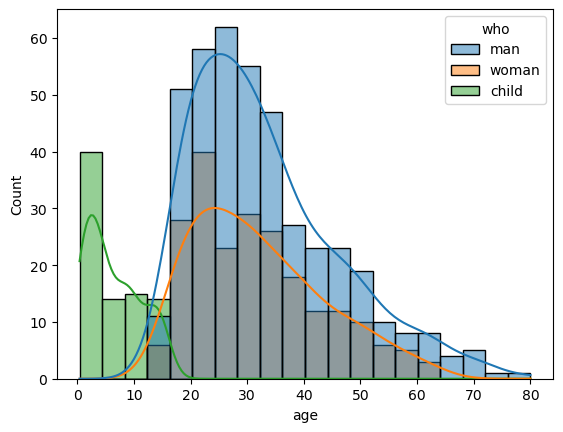

In [17]:
# Graphical Method 


sns.histplot(data=df, x='age', hue='who', kde=True)

# **Check with Coding**

# **shapiro wilk test on normal Distribution Gaussian Distribution**

`Null Hypothesis`: The data is normally distributed

`Alternative Hypothesis`: The data is not normally distributed

In [20]:
# shapiro wilk test 

statistic, p =  stats.shapiro(df['age'])



statistic: =  nan
p-value: =  1.0


In [19]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)